# Mapa de calor 

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [7]:
df=pd.read_csv('Trees_in_camden_cleanGeneral.csv')
df.head()

,Number Of Trees,Sequence,Height In Metres,Spread In Metres,Diameter In Centimetres At Breast Height,Capital Asset Value For Amenity Trees,Carbon Storage In Kilograms,Gross Carbon Sequestration Per Year In Kilograms,Pollution Removal Per Year In Grams,Easting,Northing,Longitude,Latitude,Ward,Lower Layer Super Output Area (LSOA),Contract Area,Scientific Name
0,1.0,198.0,12.0,9.0,30.0,7767.40,198.3,7.5,232.1,526047,185996,-0.183115,51.558770,6.0,44.0,3,53
1,1.0,21.0,12.0,9.0,30.0,6796.48,160.6,5.4,295.3,528337,184543,-0.150618,51.545203,9.0,64.0,3,42
2,1.0,82.0,7.0,6.0,31.0,8293.86,193.8,7.6,88.5,528626,185637,-0.146054,51.554969,10.0,71.0,3,98
3,4.0,371.0,5.0,5.0,17.0,1870.64,48.1,3.1,35.1,528601,187238,-0.145839,51.569364,10.0,72.0,4,27
4,1.0,44.0,21.0,16.0,74.0,36758.02,1674.4,27.4,761.3,526165,183803,-0.182193,51.539037,13.0,93.0,3,5


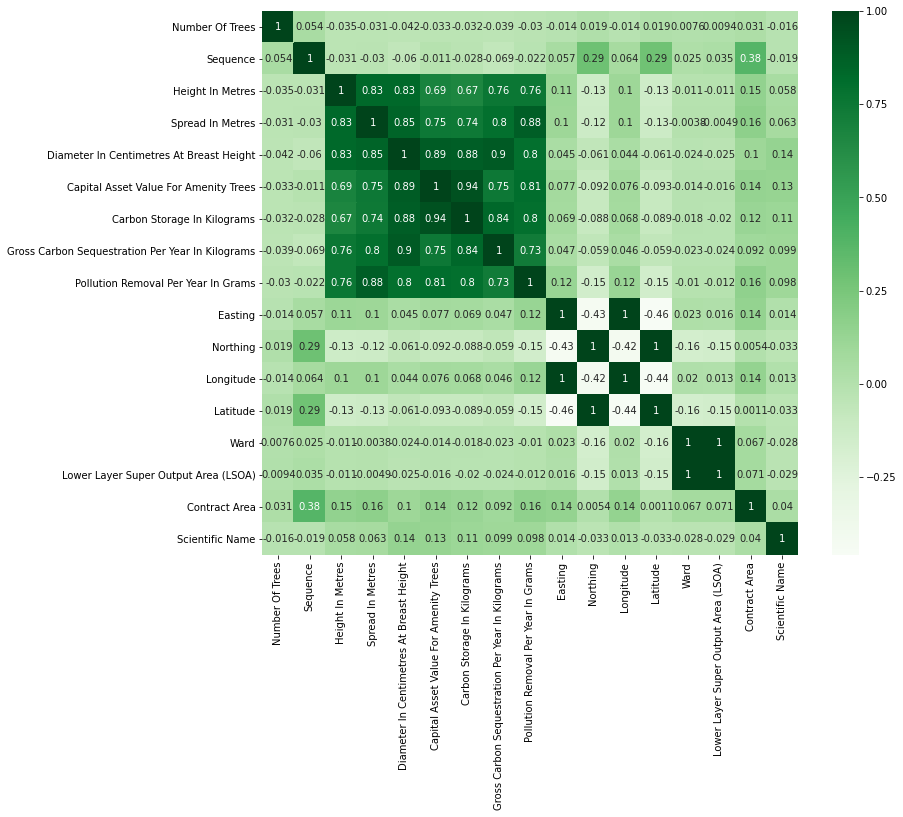

In [8]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)
plt.show()

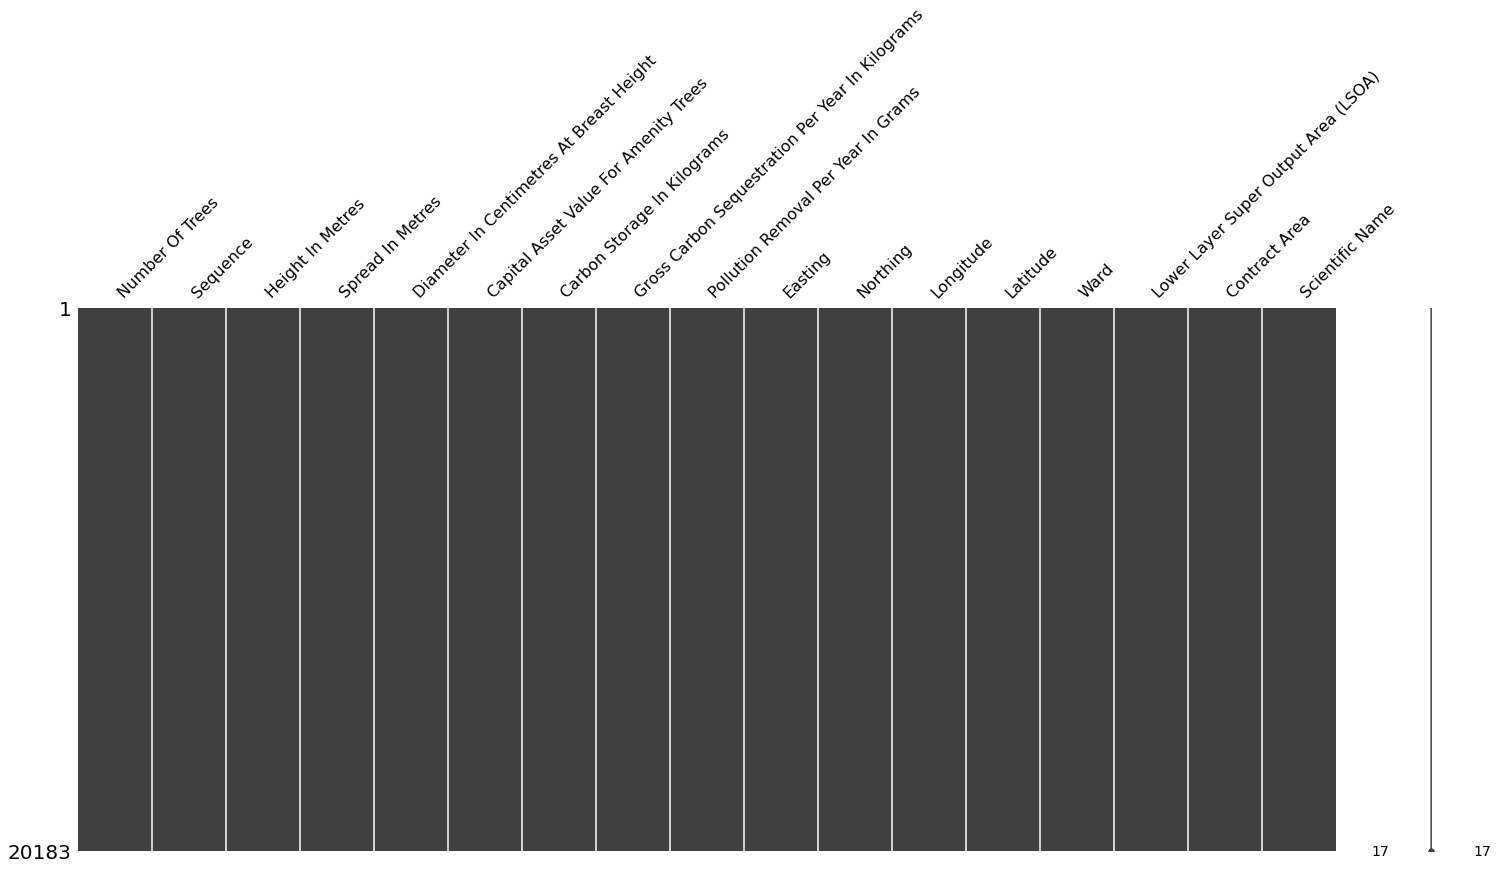

In [9]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

In [10]:
#Correlación respecto a la variable de salida o target
pol="Pollution Removal Per Year In Grams"
cor_target = abs(cor[pol])
#selección de características altamente correlacionadas
relevant_features = cor_target[cor_target>0.5]

# Eliminacion 

In [11]:
model = LinearRegression()
X = df.drop(pol,1)   #Características
y = df[pol]  
#Método RFE
rfe = RFE(model, 7, verbose=1)

#Transformando los datos usando el método RFE
X_rfe = rfe.fit_transform(X,y)  

#Encontrando el modelo de los datos
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
[False False False  True  True False False  True  True False  True  True
 False False  True False]
[ 5  9  6  1  1 10  8  1  1  2  1  1  3  4  1  7]


In [12]:
#Número de características
nof_list = np.arange(1,13)            
high_score = 0

#Proceso para almacenar las características óptimas
nof = 0           
score_list = []

for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        
print("Número óptimo de características: %d" %nof)
print("Desempeño con %d características: %f" % (nof, high_score))

Número óptimo de características: 12
Desempeño con 12 características: 0.786682


In [13]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index=cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Spread In Metres', 'Diameter In Centimetres At Breast Height',
       'Gross Carbon Sequestration Per Year In Kilograms', 'Easting',
       'Northing', 'Longitude', 'Latitude', 'Ward',
       'Lower Layer Super Output Area (LSOA)', 'Contract Area'],
      dtype='object')


In [14]:
reg = LassoCV()
reg.fit(X, y)
coef = pd.Series(reg.coef_, index = X.columns)
print("Número óptimo de características:" + str(sum(coef != 0)))
print("Desempeño mediante la regularización Lasso: %f" %reg.score(X,y))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Número óptimo de características:4
Desempeño mediante la regularización Lasso: 0.670609


Text(0.5, 1.0, 'Importancia de las características usando el modelo de Lasso')

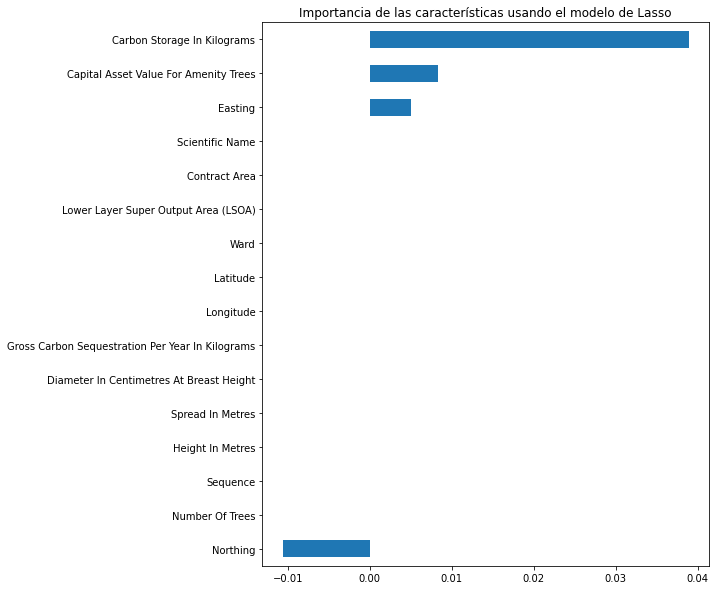

In [15]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Importancia de las características usando el modelo de Lasso")